## From Seattle rain/temp data, see if TMAX can be predicted based on the value of TMIN

## import the necessary modules

In [1]:
import numpy as np
import pandas as pd
from datetime import date as dt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Ridge, Lasso, RidgeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm

## Read the file and inspect the contents(column headings, missing data, shape)

In [2]:
# rain= pd.read_csv('seattleweather_1948-2017.csv', parse_dates=True, index_col='DATE')
rain= pd.read_csv('seattleweather_1948-2017.csv')
print(rain.head())
print(rain.tail())
print(rain.shape)
rain.info()

# print(rain['TMAX'].sort_values())
rain_drop= rain.drop(rain.index[1419])
rain=rain_drop
# print(rain_drop['TMAX'].sort_values())



     DATE  PRCP  TMAX  TMIN  RAIN
0  1/1/48  0.47    51    42  True
1  1/2/48  0.59    45    36  True
2  1/3/48  0.42    45    35  True
3  1/4/48  0.31    45    34  True
4  1/5/48  0.17    45    32  True
           DATE  PRCP  TMAX  TMIN   RAIN
25546  12/10/17   0.0    49    34  False
25547  12/11/17   0.0    49    29  False
25548  12/12/17   0.0    46    32  False
25549  12/13/17   0.0    48    34  False
25550  12/14/17   0.0    50    36  False
(25551, 5)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25551 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25551 non-null object
PRCP    25548 non-null float64
TMAX    25551 non-null int64
TMIN    25551 non-null int64
RAIN    25548 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 998.2+ KB


## Fill missing values with 0

In [3]:
rain= rain.fillna(0)
rain.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25550 entries, 0 to 25550
Data columns (total 5 columns):
DATE    25550 non-null object
PRCP    25550 non-null float64
TMAX    25550 non-null int64
TMIN    25550 non-null int64
RAIN    25550 non-null object
dtypes: float64(1), int64(2), object(2)
memory usage: 1.2+ MB


## Plot  TMIN vs TMAX for visual inspection of the data

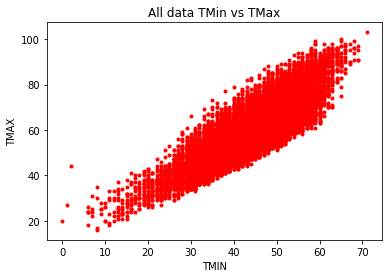

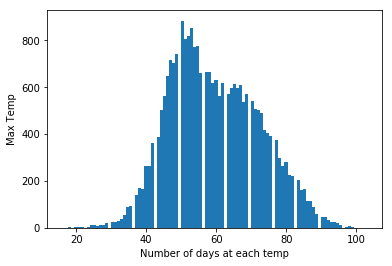

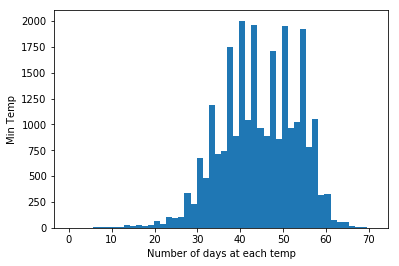

In [4]:

plt.plot(rain['TMIN'], rain['TMAX'], marker='.', linestyle='none', color='red')
plt.xlabel('TMIN')
plt.ylabel('TMAX')
plt.title('All data TMin vs TMax')
plt.show()

plt.hist(rain['TMAX'], bins=100)
plt.ylabel('Max Temp')
plt.xlabel('Number of days at each temp')
plt.show()

plt.hist(rain['TMIN'], bins=50)
plt.xlabel('Number of days at each temp')
plt.ylabel('Min Temp')
plt.show()

## Set of data for modeling, create training and test sets

In [5]:
x= rain.drop(['DATE','TMAX', 'PRCP', 'RAIN'], axis=1).values
y= rain['TMAX'].values
y= y.reshape(-1, 1)

#train/test split for LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


## Linear regression model

In [6]:
reg= linear_model.LinearRegression()
reg.fit(x_train, y_train)

y_pred = reg.predict(x_test)
print('R2_train: {}'.format(reg.score(x_train, y_train)))
print('R2_test: {}'.format(reg.score(x_test, y_test)))

#difference between actual observations and values predicted by the model
rsme= np.sqrt(mean_squared_error(y_test, y_pred))
print('mse_ytest_vs_ypred', rsme)

R2_train: 0.7423973637260489
R2_test: 0.7381994599528328
mse_ytest_vs_ypred 6.516197415383963


# #plot data and regression line


R2_data: 0.7411552702509028


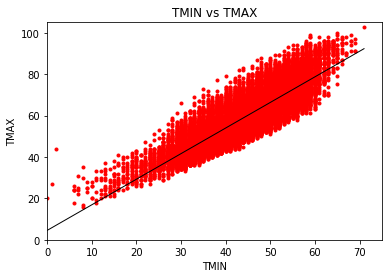

In [7]:
reg.fit(x, y)
prediction = np.linspace(min(x), max(x)).reshape(-1, 1)
# print(prediction)
print('R2_data: {}'.format(reg.score(x, y)))
plt.scatter(x, y, marker='.', color='red')
plt.plot(prediction, reg.predict(prediction), color='black', linewidth=1)
plt.ylim([0, 105])
plt.xlim([0, 75])
plt.ylabel('TMAX')
plt.xlabel('TMIN')
plt.title('TMIN vs TMAX')
plt.show()

## Cross validation to test sample set

In [8]:
#Crossvalidation and model performance test
cv_results= cross_val_score(reg, x, y, cv=10)
print(cv_results)
print(np.mean(cv_results))

[0.64027721 0.74790021 0.73470451 0.75410814 0.73395355 0.74509775
 0.74069774 0.74337409 0.7669796  0.776084  ]
0.738317680801102


## Ridge regression model

In [9]:
ridge= Ridge(alpha=0.1, normalize=True)
ridge.fit(x_train, y_train)

y_pred = ridge.predict(x_test)
print('R2_train: {}'.format(ridge.score(x_train, y_train)))
print('R2_test: {}'.format(ridge.score(x_test, y_test)))
rsme= np.sqrt(mean_squared_error(y_test, y_pred))
print('mse_ytest_vs_ypred', rsme)

R2_train: 0.7362618483233543
R2_test: 0.732359859751637
mse_ytest_vs_ypred 6.588470240576866


## Cross validation to test sample set

In [10]:
#Crossvalidation and model performance test
cv_results= cross_val_score(ridge, x, y, cv=10)
print(cv_results)
print(np.mean(cv_results))

[0.65354606 0.74006372 0.72734224 0.74321249 0.72986051 0.73673882
 0.73310786 0.73602861 0.75922829 0.76588319]
0.7325011787621987


In [11]:
clf= svm.SVR()
y_train= np.ravel(y_train)
clf.fit(x_train, y_train)


y_pred = clf.predict(x_test)
print('R2_train: {}'.format(clf.score(x_train, y_train)))
print('R2_test: {}'.format(clf.score(x_test, y_test)))
rsme= np.sqrt(mean_squared_error(y_test, y_pred))
print('mse_ytest_vs_ypred', rsme)

R2_train: 0.7364474495530972
R2_test: 0.730045600552917
mse_ytest_vs_ypred 6.616893870931211


In [12]:
from sklearn.svm import LinearSVR
# from sklearn.datasets import make_regression
# X, y = make_regression(n_features=4, random_state=0)
regr = LinearSVR(C=1, random_state=0, epsilon=0.15)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)
print('R2_train: {}'.format(regr.score(x_train, y_train)))
print('R2_test: {}'.format(regr.score(x_test, y_test)))


R2_train: 0.7352474802374692
R2_test: 0.7312778070453314
